In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict,cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic, WhiteKernel, Matern
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

import joblib
import matplotlib.pylab as pylab
import matplotlib as mpl
from sklearn.linear_model import RandomizedLasso
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

#pandas
import pandas as pd
import math
from math import sqrt
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import sys
from time import time
from enum import Enum

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow import keras

In [120]:
# read training and test data from local disk
data_dir = "/home/peng/cooperating/project/data_model1/"
#data_dir1 = "/home/peng/cooperating/project/B_net/Data_Threshold/"
# read training data
number_of_samples = 60000
x_train_data = np.loadtxt(data_dir + "x_data_train.txt")
x_train = x_train_data.reshape(number_of_samples, 28, 28, 1)

y_train_data = np.loadtxt(data_dir + "0.0001/y_data_train.txt")
y_train = y_train_data.reshape(number_of_samples, 1)
y_train = pd.DataFrame(data=y_train, index=None, columns=None)

# read testing data
number_of_samples = 10000
#x_test_all = np.loadtxt(data_dir + "x_data_test.txt").reshape(number_of_samples, 1, 28, 28)
#x_data = [x.flatten() for x in x_data ]
#x_test_all = pd.DataFrame(data=x_data, index=None, columns=None)   
x_test_data = np.loadtxt(data_dir + "x_data_test.txt")
x_test = x_test_data.reshape(number_of_samples, 28, 28, 1)

y_test_data = np.loadtxt(data_dir + "0.0001/y_data_test.txt")
#y_test_data = np.loadtxt(data_dir + "lenet_0001.txt")
y_test = y_test_data.reshape(number_of_samples, 1)
y_test = pd.DataFrame(data=y_test, index=None, columns=None)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

from datasets import mnist
#The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples.

X_train, Y_train, X_test, Y_test = mnist.get_data()
print(X_train.shape)

((60000, 28, 28, 1), (60000, 1), (10000, 28, 28, 1), (10000, 1))
(60000, 1, 28, 28)


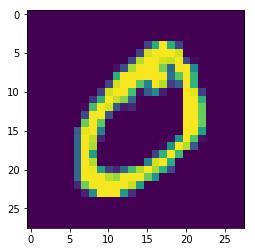

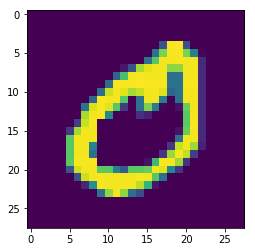

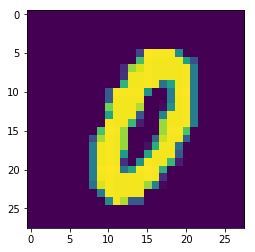

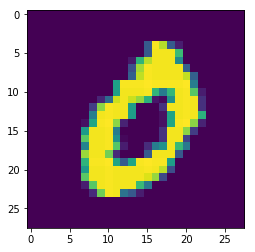

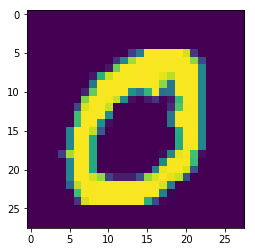

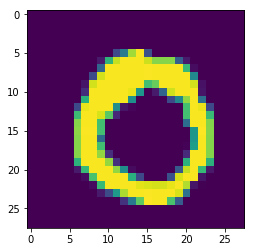

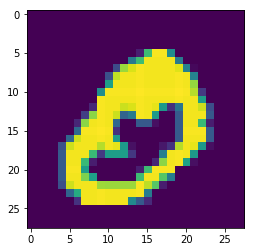

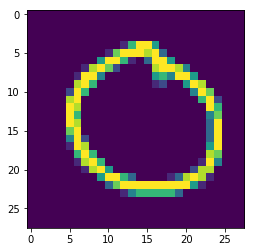

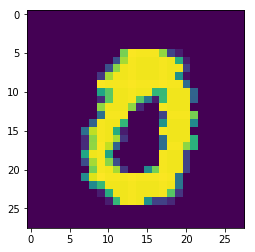

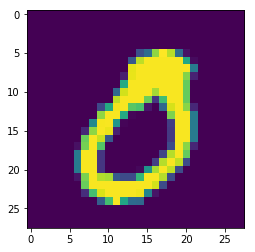

In [121]:
# show some input data image 
for i in range(10):
    plt.imshow(X_train[i].reshape(28, 28))
    plt.show()

In [122]:
print(x_train_data.shape, y_train_data.shape, x_test_data.shape, y_test_data.shape)
print(len([val for val in y_test_data>0 if val==True]))
      
x_train = x_train_data.reshape((len(x_train_data), np.prod(x_train_data.shape[1:])))
x_test = x_test_data.reshape((len(x_test_data), np.prod(x_test_data.shape[1:])))

x_train_all = []
y_train_all = []

x_test_all = []
y_test_all = []


for i in range(10):
    x_train_all.append(x_train[Y_train == i])
    y_train_all.append(y_train[Y_train == i])
    x_test_all.append(x_test[Y_test == i])
    y_test_all.append(y_test[Y_test == i])
    


((60000, 784), (60000,), (10000, 784), (10000,))
2992


In [123]:
# training data for autoencoder..
x_train_easy = []
x_train_hard = []
x_test_easy = []
x_test_hard = []
x_tmptest_easy = []


num_classes = 10


# use only half of the output classes to train one autoencoder. 
# first half : range(int(num_classes/2))
# second half : range(int(num_classes/2), num_classes)

y_trndata_easy = []
y_trndata_hard = []
y_testdata_easy = []
y_testdata_hard = []

#for i in range(int(num_classes/2), num_classes):
for i in range(int(num_classes)):

    trn_easy = x_train_all[i][y_train_all[i][0]==0]
    trn_hard = x_train_all[i][y_train_all[i][0]>0]
    
    test_easy = x_test_all[i][y_test_all[i][0]==0]
    test_hard = x_test_all[i][y_test_all[i][0]>0]
    test_easy_tmp = x_test_all[i][y_test_all[i][0]==0]
    
    # there are more easy examples than hard examples
    n1 = trn_hard.shape[0]
    n2 = trn_easy.shape[0]
    #trn_easy = trn_easy[0:n1]
    #trn_hard = trn_hard[0:n1]
    
    trn_hard = np.concatenate((trn_hard[0:n1],  trn_easy[n1:n2]), axis=0)
    
    
    n3 = test_hard.shape[0]
    n4 = test_easy.shape[0]
    test_hard = np.concatenate((test_hard[0:n3], test_easy[n3:n4]), axis=0)
    #test_easy = test_easy[0:n2]
    #test_hard = test_hard[0:n2]
    
    for j in range(1,n2):
        trn_easy[j] = trn_easy[0] 
        
    for j in range(1,n4):
        test_easy[j] = trn_easy[0]
    
    x_train_easy.append(trn_easy)
    x_train_hard.append(trn_hard)
    
    
    # testing data
    x_test_easy.append(test_easy)
    x_test_hard.append(test_hard)
    y_trndata_hard += [i for _ in (y_train_all[i][0]>0) if _ is True]
    y_testdata_easy += [i for _ in (y_test_all[i][0]==0) if _ is True]
    y_testdata_hard += [i for _ in (y_test_all[i][0]>0) if _ is True]

x_trndata_easy = np.concatenate(x_train_easy)
x_trndata_hard = np.concatenate(x_train_hard)
x_testdata_easy = np.concatenate(x_test_easy)
x_testdata_hard = np.concatenate(x_test_hard)

print (x_trndata_easy.shape, x_trndata_hard.shape, x_testdata_easy.shape, x_testdata_hard.shape, len(y_trndata_hard))

for i in range(5):
    print (i, x_train_easy[i].shape[0])
    print (i, x_train_hard[i].shape[0])



((41150, 784), (41150, 784), (7008, 784), (7008, 784), 18850)
(0, 4630)
(0, 4630)
(1, 3695)
(1, 3695)
(2, 4823)
(2, 4823)
(3, 4747)
(3, 4747)
(4, 3802)
(4, 3802)


In [124]:
#autoencoder 

from tensorflow.keras import regularizers

# This is the size of our encoded representations
encoding_dim = 512  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
#with batch size 4, encoding_dim 128, validation error  = 0.12
#                           256,                     0.1166
#                           512,                     0.1128
# This is our input image

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(512, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = layers.Dense(256, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(512, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
#decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# use more layer, todo 

In [125]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_trndata_hard, x_trndata_easy,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(x_testdata_hard, x_testdata_easy))


Train on 41150 samples, validate on 7008 samples
Epoch 1/100
41150/41150 [==============================] - 7s 178us/sample - loss: 0.1277 - val_loss: 0.0915
Epoch 2/100
41150/41150 [==============================] - 7s 163us/sample - loss: 0.0848 - val_loss: 0.0839
Epoch 3/100
41150/41150 [==============================] - 7s 165us/sample - loss: 0.0794 - val_loss: 0.0842
Epoch 4/100
41150/41150 [==============================] - 7s 165us/sample - loss: 0.0765 - val_loss: 0.0807
Epoch 5/100
41150/41150 [==============================] - 7s 166us/sample - loss: 0.0744 - val_loss: 0.0802
Epoch 6/100
41150/41150 [==============================] - 7s 165us/sample - loss: 0.0733 - val_loss: 0.0796
Epoch 7/100
41150/41150 [==============================] - 7s 164us/sample - loss: 0.0721 - val_loss: 0.0792
Epoch 8/100
41150/41150 [==============================] - 7s 168us/sample - loss: 0.0718 - val_loss: 0.0797
Epoch 9/100
41150/41150 [==============================] - 7s 165us/sample - lo

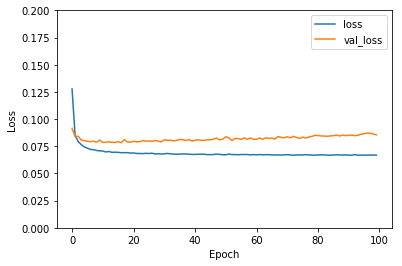

In [126]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='upper right')
plt.show()

#autoencoder.save('./autoencoder2')

In [106]:

from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda
import dill
import time

def measure_performance_branchynet(X, Y):
    # load branchynet
    branchyNet = None
    with open("_models/lenet_mnist.bn", "rb") as f:
        branchyNet = dill.load(f)
    #set network to inference mode, this is fob_test_data_yr measuring baseline function. 
    branchyNet.testing()
    branchyNet.verbose = False

    #branchyNet.to_cpu()
    TEST_BATCHSIZE = 1    
    thresholds = [0.0001]
    #print(decoded_imgs.shape)
    
    start = time.time()
    
    branchyNet.to_cpu()
    c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, X, Y, thresholds,
                                                       batchsize=TEST_BATCHSIZE, verbose=True)

    end = time.time()
    print("accuracy is ", c_accs)
    print("the distribution of exit number is ", c_exits)
    print("running time(s) is ", end - start)
    
# show some easy data and hard data

def show_all(X_easy, X_hard, length = 100):
    n = 40
    for shift in range(0, length, 40):
        plt.figure(figsize=(20, 4))
        for i in range(1, n + 1):
            # Display original
            ax = plt.subplot(n/20, 20, i)
            plt.imshow(X_easy[shift+i-1].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
    
        plt.figure(figsize=(20, 4))
        for i in range(1, n + 1):
            # Display original
            ax = plt.subplot(n/20, 20, i)
            plt.imshow(X_hard[shift+i-1].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
        print("---------------------***********************************************--------------")
#Verify by branchynet

In [129]:
# autoencoder data

b_test_data_x = X_test.reshape(X_test.shape[0], 784)
b_test_data_y = y_testdata_easy
print(b_test_data_x.shape)
print(y_test.shape)


decoded_imgs = autoencoder.predict(b_test_data_x)
np.savetxt('simple_encoded_.0005.txt',decoded_imgs)
print(decoded_imgs.shape)

#show_all(b_test_data_x, filter_imgs, length=200)




(10000, 784)
(10000, 1)
(10000, 784)


In [111]:
measure_performance_branchynet(decoded_imgs.reshape(X_test.shape[0], 1, 28,28), Y_test)

('accuracy is ', array([0.9684]))
('the distribution of exit number is ', [array([9774,  226])])
('running time(s) is ', 74.11087894439697)


### measure_performance_branchynet(x_testdata_easy.reshape(x_testdata_easy.shape[0], 1, 28, 28), y_testdata_easy)

In [332]:
print()
measure_performance_branchynet(x_testdata_hard.reshape(x_testdata_hard.shape[0], 1, 28, 28), y_testdata_easy)

()
('accuracy is ', array([0.99070016]))
('the distribution of exit number is ', [array([8710,  645])])
('running time(s) is ', 17.52030611038208)


In [259]:


measure_performance_branchynet(X_test[Y_test<5], Y_test[Y_test<5])

('accuracy is ', array([0.9939677]))
('the distribution of exit number is ', [array([4872,  267])])
('running time(s) is ', 11.07143497467041)


In [260]:
b_test_data_x = X_test[Y_test<5].reshape(X_test[Y_test<5].shape[0], 784)

decoded_imgs = autoencoder.predict(b_test_data_x)

measure_performance_branchynet(decoded_imgs.reshape(X_test[Y_test<5].shape[0], 1, 28,28), Y_test[Y_test<5])

('accuracy is ', array([0.9918272]))
('the distribution of exit number is ', [array([5092,   47])])
('running time(s) is ', 10.228823900222778)


In [ ]:
Easy data without autoencoder:
('accuracy is ', array([0.99938424]))
('the distribution of exit number is ', [array([4872,    0])])
('running time(s) is ', 10.163007974624634)

Hard data without autoencoder:
('accuracy is ', array([0.89513108]))
('the distribution of exit number is ', [array([0, 267])])
('running time(s) is ', 0.7401120662689209)


Easy data with autoencoder:
('accuracy is ', array([0.96982759]))
('the distribution of exit number is ', [array([4737,  135])])
('running time(s) is ', 9.951025009155273)


Hard data with autoencoder:
('accuracy is ', array([0.84644195]))
('the distribution of exit number is ', [array([233,  34])])
('running time(s) is ', 0.7952151298522949)


Easy data + Hard data without autoencoder:
('accuracy is ', array([0.9939677]))
('the distribution of exit number is ', [array([4872,  267])])
('running time(s) is ', 10.22938323020935)

Easy data + Hard data with autoencoder, which is trained by hard data only:
('accuracy is ', array([0.96341701]))
('the distribution of exit number is ', [array([4970,  169])])
('running time(s) is ', 10.859180927276611)


Easy data + Hard data with autoencoder, which is trained by easy data + hard data:
('accuracy is ', array([0.99158456]))
('the distribution of exit number is ', [array([4825,   47])])
('running time(s) is ', 10.045063972473145)

In [ ]:
# data for label 5,6,7,8,9
Easy data + hard data without autoencoder 
('accuracy is ', array([0.98750836]))
('the distribution of exit number is ', [array([4105,  378])])
('running time(s) is ', 8.227171897888184)

Easy data + hard data with autoencoder
('accuracy is ', array([0.98527772]))
('the distribution of exit number is ', [array([4397,   86])])
('running time(s) is ', 7.992626905441284)



In [232]:
# measure CPU usage
import psutil
import random
import threading

t = []

class DisplayCPU(threading.Thread):

    def run(self):

        self.running = True

        currentProcess = psutil.Process()

        while self.running:
            global t
            t.append(currentProcess.cpu_percent(interval=1))

    def stop(self):
        self.running = False


# define a thread
display_cpu = DisplayCPU()
display_cpu.start()
try:
    # put function name, which need to measure cpu usage 
    result = measure_performance_branchynet(np.concatenate((x_testdata_hard, x_testdata_easy), axis=0).reshape(4878+261, 1, 28, 28),
                                            y_testdata_hard+y_testdata_easy)
finally: # stop thread even when I press Ctrl+C
    display_cpu.stop()
    print(sum(t)/len(t))
    print(t)

('accuracy is ', array([0.9939677]))
('the distribution of exit number is ', [array([4872,  267])])
('running time(s) is ', 10.22938323020935)
3056.15
[2911.1, 3094.5, 3069.3, 2994.1, 3043.1, 3089.0, 3141.3, 3127.3, 3094.3, 2997.5]


In [234]:
# 
t = []

decoded_imgs = autoencoder.predict(np.concatenate((x_testdata_hard, x_testdata_easy), axis=0))

display_cpu = DisplayCPU()
display_cpu.start()
try:
    # put function name, which need to measure cpu usage 
    result = measure_performance_branchynet(decoded_imgs.reshape(decoded_imgs.shape[0], 1, 28, 28), y_testdata_hard+y_testdata_easy)
finally: # stop thread even when I press Ctrl+C
    display_cpu.stop()
    print(sum(t)/len(t))
    

('accuracy is ', array([0.96341701]))
('the distribution of exit number is ', [array([4970,  169])])
('running time(s) is ', 10.897365093231201)
3059.27


In [ ]:
# check model 5-9 for data 







In [ ]:
#combine more data 

In [300]:
def mse(input_img, decoded_img):
    return np.square(np.subtract(input_img, decoded_img)).mean() 

def mae(input_img, decoded_img):
    return np.absolute(np.subtract(input_img, decoded_img)).mean() 

autoencoder1 = keras.models.load_model('autoencoder1')
autoencoder2 = keras.models.load_model('autoencoder2')

In [301]:
print(X_test.shape)
input_imgs = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
#input_imgs = x_testdata_hard
decoded_imgs1 = autoencoder1.predict(input_imgs)
decoded_imgs2 = autoencoder2.predict(input_imgs)


(10000, 1, 28, 28)


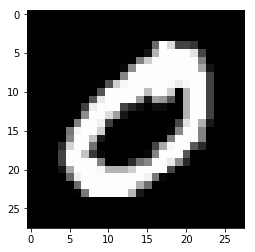

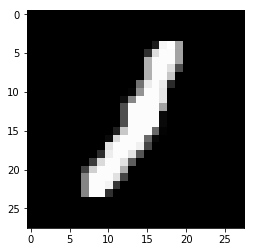

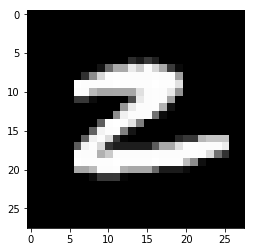

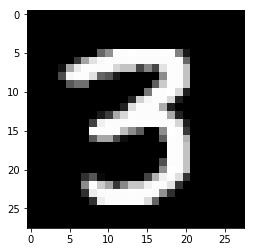

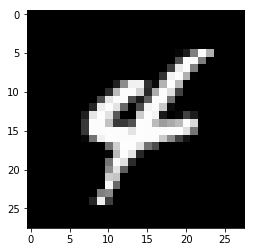

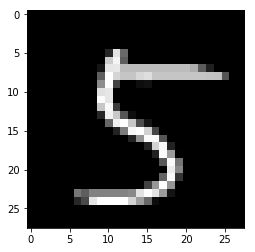

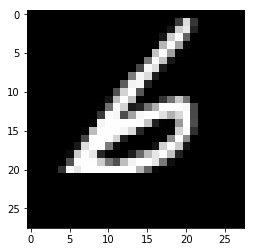

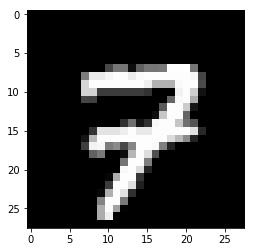

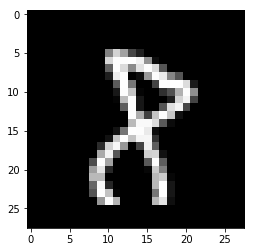

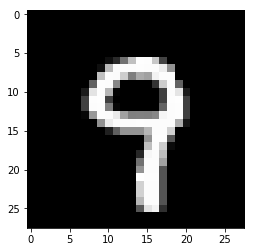

5


In [312]:
x_ref1_easy = []
x_ref2_easy = []

num_classes = 10

for i in range(int(num_classes/2)):
    ref_easy = x_train_all[i][y_train_all[i][0]==0]
    x_ref1_easy.append(ref_easy[16])
    plt.imshow(x_ref1_easy[i].reshape(28, 28))
    plt.show()


for i in range(int(num_classes/2), num_classes):
    ref_easy = x_train_all[i][y_train_all[i][0]==0]
    x_ref2_easy.append(ref_easy[101])
    plt.imshow(x_ref2_easy[i-5].reshape(28, 28))
    plt.show()

print (len(x_ref1_easy))

[0.041745385729139266, 0.146773281346253, 0.1655939718778363, 0.18515725077669415, 0.15678219121197604]
[0.07971810787515901, 0.09893450444984393, 0.10089284813462294, 0.07881488471710502, 0.0684337309282366]
[0.18213485528345916, 0.1717370495681102, 0.17922114104301512, 0.16709544728185305, 0.18687710603260674]
[0.1557840609749415, 0.18181109901284814, 0.16859422342641925, 0.13724846968614446, 0.1515560163340034]
[0.15000589, 0.15350631, 0.15204582, 0.15036216, 0.15100813]
[0.14250952, 0.16377063, 0.15366943, 0.14186583, 0.15206726]
(10000, 784)


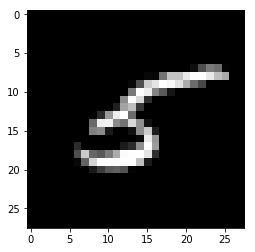

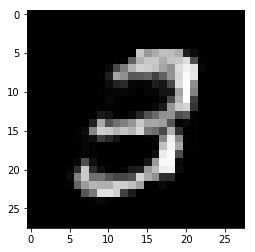

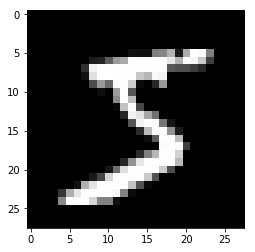

In [313]:
x = 6000
#for i in5range(decoded_imgs1.shape[0]):
decoded_err1 = [mse(decoded_imgs1[i], x_ref1_easy[c]) for c in range(int(num_classes)/2)]
decoded_err2 = [mse(decoded_imgs2[i], x_ref2_easy[c]) for c in range(int(num_classes)/2)]
input_err1 = [mse(input_imgs[i], x_ref1_easy[c]) for c in range(int(num_classes)/2)]
input_err2 = [mse(input_imgs[i], x_ref2_easy[c]) for c in range(int(num_classes)/2)]
recon_err1 = [mse(input_imgs[i], decoded_imgs1[c]) for c in range(int(num_classes)/2)]
recon_err2 = [mse(input_imgs[i], decoded_imgs2[c]) for c in range(int(num_classes)/2)]

print (decoded_err1)
print (decoded_err2)
print (input_err1)
print (input_err2)
print (recon_err1)
print (recon_err2)


final_imgs = []


for i in range(input_imgs.shape[0]):
    if min(decoded_err1) < min(decoded_err2):
        final_imgs.append(decoded_imgs1[i])
    else:
        final_imgs.append(decoded_imgs2[i])

final_imgs = np.array(final_imgs)
print (final_imgs.shape)
'''
for c in range(int(num_classes)/2):
    print (mse(decoded_imgs1[i], x_ref1_easy[c]))

print ("\n ----------------\n")
#for i in range(decoded_imgs2.shape[0]):
for c in range(int(num_classes)/2):
    print (mse(decoded_imgs2[i], x_ref2_easy[c]))

'''
plt.imshow(input_imgs[x].reshape(28, 28))
plt.show()
plt.imshow(decoded_imgs1[x].reshape(28, 28))
plt.show()
plt.imshow(decoded_imgs2[x].reshape(28, 28))
plt.show()

In [314]:
# test all data 
t = []

display_cpu = DisplayCPU()
display_cpu.start()
try:
    # put function name, which need to measure cpu usage 
    result = measure_performance_branchynet(final_imgs.reshape(final_imgs.shape[0], 1, 28, 28), Y_test)
finally: # stop thread even when I press Ctrl+C
    display_cpu.stop()
    print(sum(t)/len(t))
    

('accuracy is ', array([0.5677]))
('the distribution of exit number is ', [array([7609, 2391])])
('running time(s) is ', 22.381342887878418)
3054.94090909


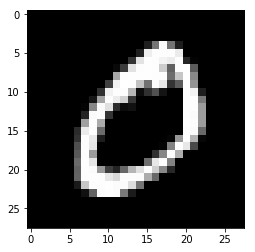

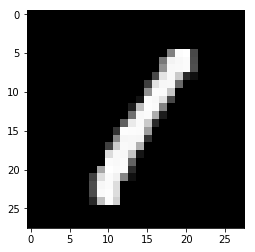

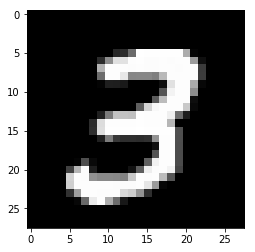

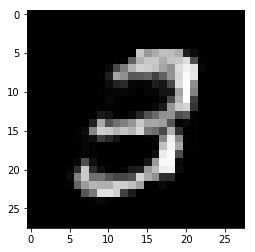

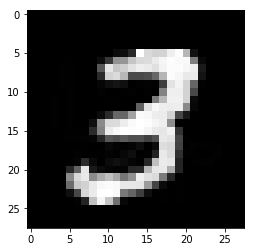

0
1
3
5
7


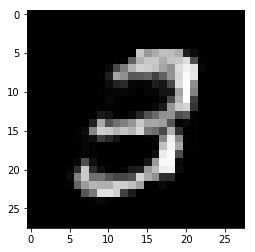

In [315]:
for i in range(5):
    plt.imshow(final_imgs[i*2000].reshape(28, 28))
    plt.show()
for i in range(5):
    print (Y_test[i*2000])
    
plt.imshow(final_imgs[6000].reshape(28, 28))
plt.show()

In [284]:
# training the very simple CNN model. 


In [10]:
# testing untrained model.
# get first layer data
model1 = models.Sequential()
model1.add(tf.keras.layers.Conv2D(1, (5, 5), input_shape=[img_rows, img_cols, 1], padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model1.add(tf.keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
#model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model1.add(tf.keras.layers.Conv2D(120, (5, 5), activation='relu'))
#model1.add(tf.keras.layers.Dropout(0.25))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(84, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.summary()

from tensorflow.keras import backend as K
layerIndex = 1
func1 = K.function([model1.get_layer(index=0).input], model1.get_layer(index=layerIndex).output)
layerOutput = func1([x_train_all])  # input_data is a numpy array
#print(layerOutput[0:1])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 1)         26        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 196)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 84)                16548     
_________________________________________________________________
dropout (Dropout)            (None, 84)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                850       
Total params: 17,424
Trainable params: 17,424
Non-trainable params: 0
__________________________________________________

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()